# Uber pickups from January to June 2015 analysis

In [60]:
import pandas as pd
import numpy as np
from matplotlib import pyplot as plt
import seaborn as sns
from IPython.display import display, HTML
import os
from plot_rides import plot_rides_by_day, plot_rides_by_hour, plot_rides_by_month

In [4]:
data = pd.read_csv('../data/uber-raw-data-janjune-15.csv')

In [6]:
data

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
0,B02617,2015-05-17 09:47:00,B02617,141
1,B02617,2015-05-17 09:47:00,B02617,65
2,B02617,2015-05-17 09:47:00,B02617,100
3,B02617,2015-05-17 09:47:00,B02774,80
4,B02617,2015-05-17 09:47:00,B02617,90
...,...,...,...,...
14270474,B02765,2015-05-08 15:43:00,B02765,186
14270475,B02765,2015-05-08 15:43:00,B02765,263
14270476,B02765,2015-05-08 15:43:00,B02765,90
14270477,B02765,2015-05-08 15:44:00,B01899,45


In [7]:
data.describe(include='all')

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID
count,14270479,14270479,14108284,1.427048e+07
unique,8,2744783,284,NaN
top,B02764,2015-06-27 22:19:00,B02764,NaN
freq,5753653,213,4352321,NaN
mean,NaN,NaN,NaN,1.520574e+02
std,NaN,NaN,NaN,7.159620e+01
min,NaN,NaN,NaN,1.000000e+00
25%,NaN,NaN,NaN,9.200000e+01
50%,NaN,NaN,NaN,1.570000e+02
75%,NaN,NaN,NaN,2.300000e+02


### Columns explanation:
    Dispatching_base_num : The TLC base company code of the base that dispatched the Uber
    Pickup_date : The date and time of the Uber pickup
    Affiliated_base_num : The TLC base company code affiliated with the Uber pickup
    locationID : The pickup location ID affiliated with the Uber pickup

Lets firstly see what we can conclude from pickup date and time

In [11]:
data['Date/Time'] = pd.to_datetime(data['Pickup_date'], format='%Y-%m-%d %H:%M:%S')

In [5]:
data

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Date/Time
0,B02617,2015-05-17 09:47:00,B02617,141,2015-05-17 09:47:00
1,B02617,2015-05-17 09:47:00,B02617,65,2015-05-17 09:47:00
2,B02617,2015-05-17 09:47:00,B02617,100,2015-05-17 09:47:00
3,B02617,2015-05-17 09:47:00,B02774,80,2015-05-17 09:47:00
4,B02617,2015-05-17 09:47:00,B02617,90,2015-05-17 09:47:00
...,...,...,...,...,...
14270474,B02765,2015-05-08 15:43:00,B02765,186,2015-05-08 15:43:00
14270475,B02765,2015-05-08 15:43:00,B02765,263,2015-05-08 15:43:00
14270476,B02765,2015-05-08 15:43:00,B02765,90,2015-05-08 15:43:00
14270477,B02765,2015-05-08 15:44:00,B01899,45,2015-05-08 15:44:00


In [12]:
data['Hour'] = data['Date/Time'].dt.hour
data['Month'] = data['Date/Time'].dt.month
data['Day'] = data['Date/Time'].dt.day
data['DayOfWeek'] = data['Date/Time'].dt.day_of_week

In [7]:
data

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Date/Time,Hour,Month,Day,DayOfWeek
0,B02617,2015-05-17 09:47:00,B02617,141,2015-05-17 09:47:00,9,5,17,6
1,B02617,2015-05-17 09:47:00,B02617,65,2015-05-17 09:47:00,9,5,17,6
2,B02617,2015-05-17 09:47:00,B02617,100,2015-05-17 09:47:00,9,5,17,6
3,B02617,2015-05-17 09:47:00,B02774,80,2015-05-17 09:47:00,9,5,17,6
4,B02617,2015-05-17 09:47:00,B02617,90,2015-05-17 09:47:00,9,5,17,6
...,...,...,...,...,...,...,...,...,...
14270474,B02765,2015-05-08 15:43:00,B02765,186,2015-05-08 15:43:00,15,5,8,4
14270475,B02765,2015-05-08 15:43:00,B02765,263,2015-05-08 15:43:00,15,5,8,4
14270476,B02765,2015-05-08 15:43:00,B02765,90,2015-05-08 15:43:00,15,5,8,4
14270477,B02765,2015-05-08 15:44:00,B01899,45,2015-05-08 15:44:00,15,5,8,4


In [8]:
np.unique(data['Month'])

array([1, 2, 3, 4, 5, 6])

In [13]:
months_map = {
    1: 'Jan',
    2: 'Feb',
    3: 'March',
    4: 'April',
    5: 'May',
    6: 'Jun'
}

In [9]:
data.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Date/Time,Hour,Month,Day,DayOfWeek
0,B02617,2015-05-17 09:47:00,B02617,141,2015-05-17 09:47:00,9,5,17,6
1,B02617,2015-05-17 09:47:00,B02617,65,2015-05-17 09:47:00,9,5,17,6
2,B02617,2015-05-17 09:47:00,B02617,100,2015-05-17 09:47:00,9,5,17,6
3,B02617,2015-05-17 09:47:00,B02774,80,2015-05-17 09:47:00,9,5,17,6
4,B02617,2015-05-17 09:47:00,B02617,90,2015-05-17 09:47:00,9,5,17,6


In [14]:
data['Month'] = data['Month'].map(months_map)

In [15]:
data.head()

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Date/Time,Hour,Month,Day,DayOfWeek
0,B02617,2015-05-17 09:47:00,B02617,141,2015-05-17 09:47:00,9,May,17,6
1,B02617,2015-05-17 09:47:00,B02617,65,2015-05-17 09:47:00,9,May,17,6
2,B02617,2015-05-17 09:47:00,B02617,100,2015-05-17 09:47:00,9,May,17,6
3,B02617,2015-05-17 09:47:00,B02774,80,2015-05-17 09:47:00,9,May,17,6
4,B02617,2015-05-17 09:47:00,B02617,90,2015-05-17 09:47:00,9,May,17,6


In [12]:
np.unique(data['Month'])

array(['April', 'Feb', 'Jan', 'Jun', 'March', 'May'], dtype=object)

### Let's see distribution of data between months

In [14]:
# Count the number of rows per month
month_counts = data['Month'].value_counts().sort_index()

In [16]:
month_order = ['Jan', 'Feb', 'March', 'April', 'May', 'Jun']

# Convert 'Month' column to a categorical type with the correct order
data['Month'] = pd.Categorical(data['Month'], categories=month_order, ordered=True)

C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):


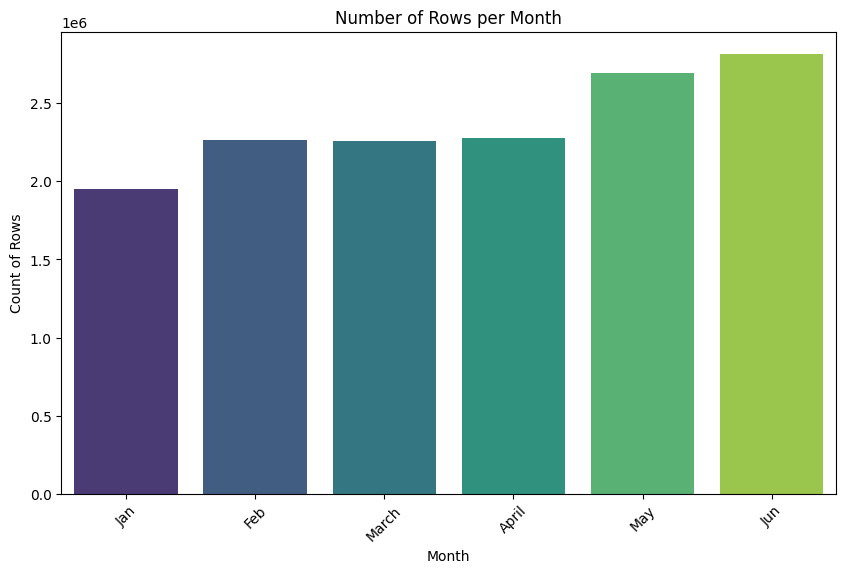

In [130]:
# Reset the index to use seaborn's plotting functions
month_counts_df = month_counts.reset_index()
month_counts_df.columns = ['Month', 'Count']

# Plot using seaborn with correct order
plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Count', data=month_counts_df, order=month_order, palette='viridis')

# Set the title and labels
plt.title('Number of Rows per Month')
plt.xlabel('Month')
plt.ylabel('Count of Rows')
plt.xticks(rotation=45)

# Show the plot
plt.show()


We can see that usage of Uber grows through months.

### Distribution of pickups between different hours in a day 

C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


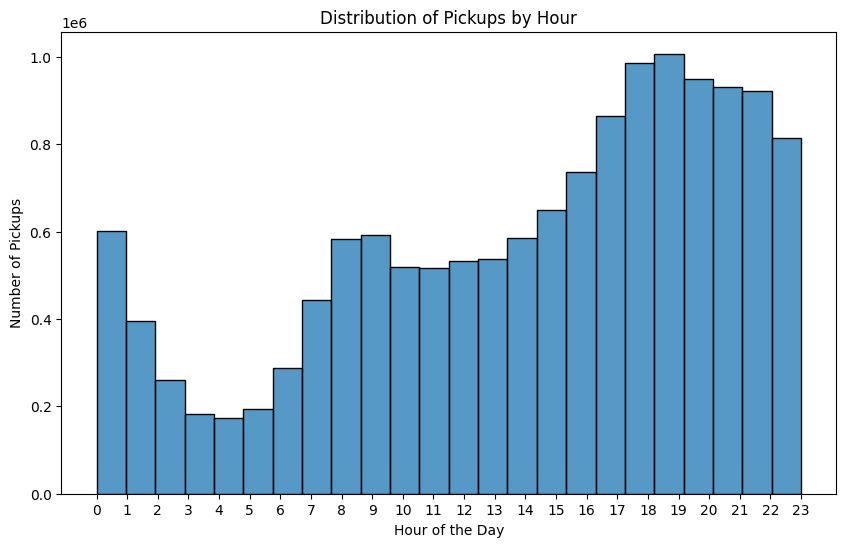

In [131]:
plt.figure(figsize=(10,6))
sns.histplot(data['Hour'], bins=24, kde=False)
plt.title('Distribution of Pickups by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.show()

As usual most piskups apear between 5 and 7pm, when people are returning home from work and heading to evening events.

In [132]:
from matplotlib.lines import Line2D

C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operati

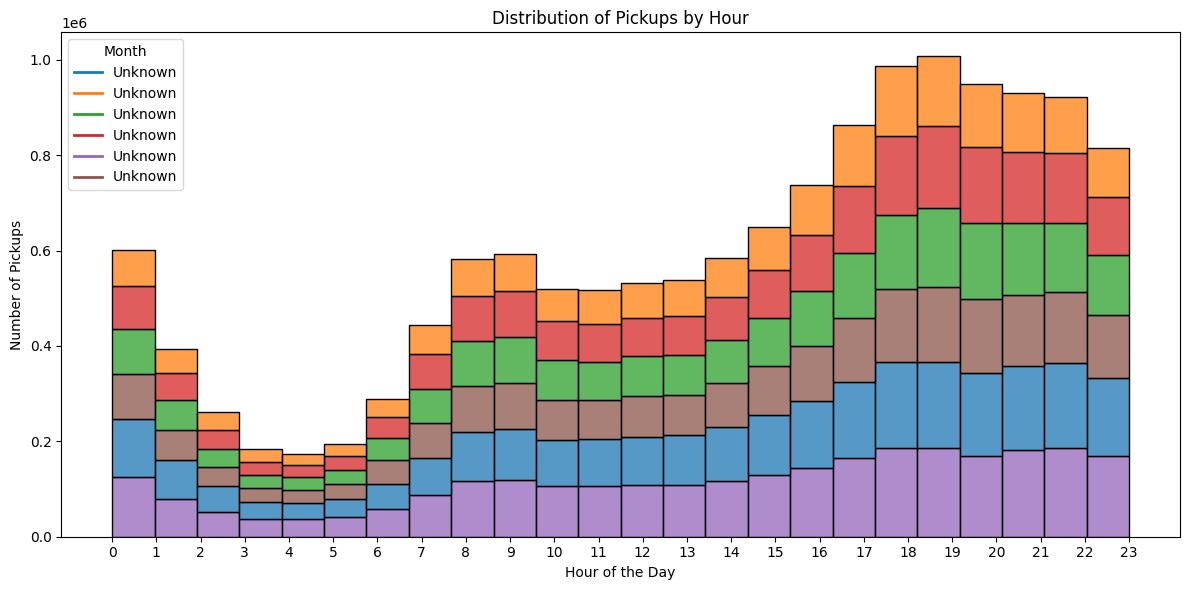

In [133]:
unique_months = data['Month'].unique()
palette = sns.color_palette('tab10', n_colors=len(unique_months))

month_palette = dict(zip(unique_months, palette))

handles = [Line2D([0], [0], color=color, lw=2) for color in palette]
labels = [months_map.get(month, 'Unknown') for month in unique_months]

plt.figure(figsize=(12,6))
sns.histplot(data=data,x='Hour',hue='Month',multiple='stack', bins=24, kde=False,palette=month_palette)
plt.title('Distribution of Pickups by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.legend(handles=handles,labels=labels,title='Month')
plt.tight_layout()
plt.show()

Uber pickups tend to be maximum around 5-6 pm, when the work-day for most poeple ends. This trend can vary for weekends, thus separately checking for weekdays and weekends

In [17]:
days_map = {1: 'Monday', 2: 'Tuesday', 3: 'Wednesday', 4: 'Thursday', 5: 'Friday', 6: 'Saturday', 0: 'Sunday'}

data['DayOfWeek'] = data['DayOfWeek'].map(days_map)

For Weekends:

In [21]:
weekend=data[(data['DayOfWeek']=='Sunday') | (data['DayOfWeek']=='Saturday')]

In [22]:
weekend

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Date/Time,Hour,Month,Day,DayOfWeek
0,B02617,2015-05-17 09:47:00,B02617,141,2015-05-17 09:47:00,9,May,17,Saturday
1,B02617,2015-05-17 09:47:00,B02617,65,2015-05-17 09:47:00,9,May,17,Saturday
2,B02617,2015-05-17 09:47:00,B02617,100,2015-05-17 09:47:00,9,May,17,Saturday
3,B02617,2015-05-17 09:47:00,B02774,80,2015-05-17 09:47:00,9,May,17,Saturday
4,B02617,2015-05-17 09:47:00,B02617,90,2015-05-17 09:47:00,9,May,17,Saturday
...,...,...,...,...,...,...,...,...,...
14239253,B02765,2015-01-04 13:35:16,B02682,249,2015-01-04 13:35:16,13,Jan,4,Saturday
14239254,B02765,2015-01-04 01:47:41,B02764,114,2015-01-04 01:47:41,1,Jan,4,Saturday
14239255,B02765,2015-01-04 19:27:16,B02646,224,2015-01-04 19:27:16,19,Jan,4,Saturday
14239256,B02765,2015-01-04 16:50:50,B00477,25,2015-01-04 16:50:50,16,Jan,4,Saturday


In [23]:
weekend = weekend.groupby('Hour').count()

In [24]:
weekend

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Date/Time,Month,Day,DayOfWeek
Hour,,,,,,,,
0,207009,207009,204647,207009,207009,207009,207009,207009
1,153703,153703,151974,153703,153703,153703,153703,153703
2,104355,104355,103100,104355,104355,104355,104355,104355
3,74418,74418,73553,74418,74418,74418,74418,74418
4,61157,61157,60498,61157,61157,61157,61157,61157
5,56541,56541,55968,56541,56541,56541,56541,56541
6,72430,72430,71661,72430,72430,72430,72430,72430
7,99806,99806,98716,99806,99806,99806,99806,99806
8,131679,131679,130164,131679,131679,131679,131679,131679


In [25]:
weekend = pd.DataFrame(weekend['Day'])
weekend.columns = ['Frequency']

In [34]:
# weekend.plot.bar()
# plt.ylabel('Frequency')
# plt.title('Uber pickups by hour - Weekends')
# plt.show()

For Weekdays:


In [27]:
weekday=data[(data['DayOfWeek']!='Sunday') & (data['DayOfWeek']!='Saturday')]

In [28]:
weekday=weekday.groupby('Hour').count()
weekday=pd.DataFrame(weekday['Day'])
weekday.columns=['Frequency']

In [35]:
# weekday.plot.bar()
# plt.ylabel('Frequency')
# plt.title('Uber pickups by hour - Weekdays')
# plt.show()

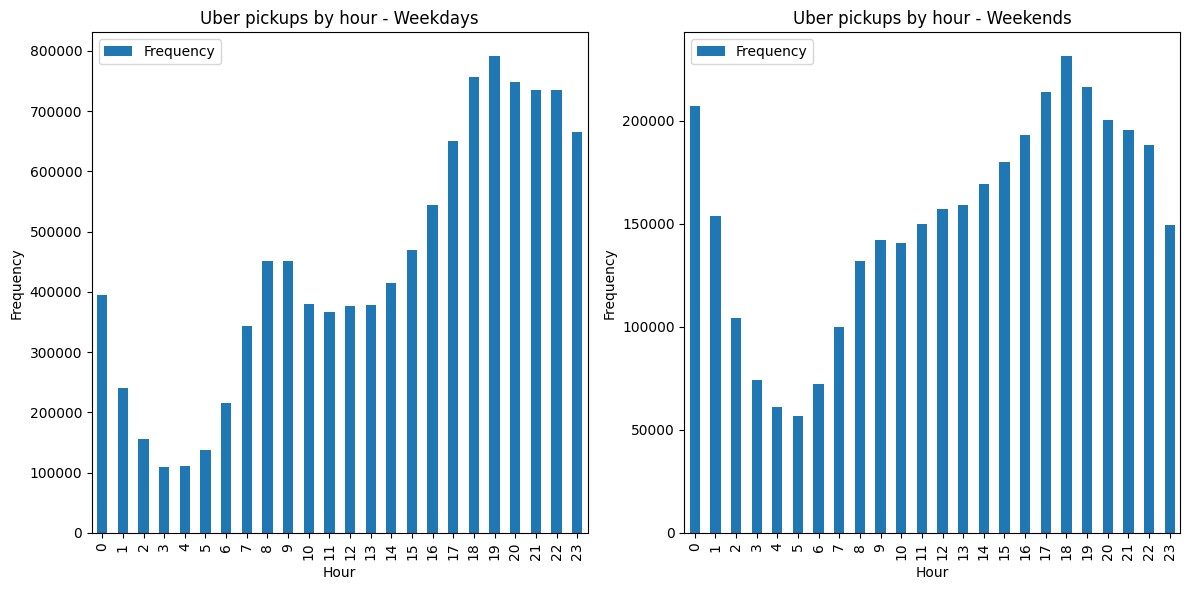

In [38]:
plt.figure(figsize=(12,6))

ax1 = plt.subplot(1,2,1)
weekday.plot.bar(ax=ax1)
plt.ylabel('Frequency')
plt.title('Uber pickups by hour - Weekdays')

ax2 = plt.subplot(1,2,2)
weekend.plot.bar(ax=ax2)
plt.ylabel('Frequency')
plt.title('Uber pickups by hour - Weekends')

plt.tight_layout()
plt.show()

In [41]:
weekday['Frequency'].sum()

10623445

In [42]:
weekend['Frequency'].sum()

3647034

Comparing the distributions of pickups during weekends and weekdays we can notice a difference in distributions in the early morning hours 0-2 am, which is expected because on weekends a lot of people tend to go out. Next, we can notice that on weekdays there is a decrease in pickup numbers between 9-15h while people are at work, whilst on weekends there is no such trend, but pickup numbers are increasing gradually from morning till peak at 18h. 
Early morning pickups i.e. from 6 am to 9 am are comparitively higher for weekdays than weekends. 
What is important to mention is that there is a significant difference in number of pickups on weekdays and weekends, so the scale in previous plots is very different.

### Distribution of data per days of a month

As we already saw how pickups are distributed for different hours of a day, it could also be interesting to see distribution within days in one month. 

C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


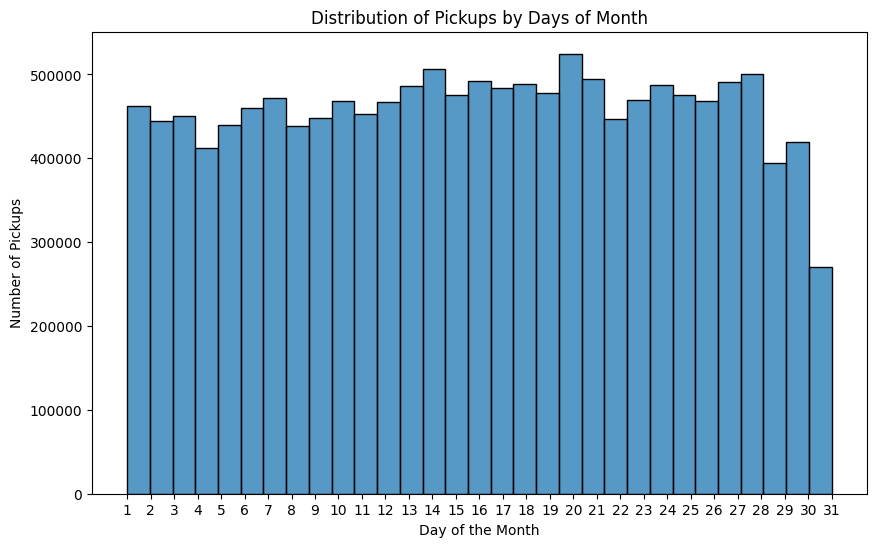

In [134]:
plt.figure(figsize=(10,6))
sns.histplot(data['Day'], bins=31, kde=False)
plt.title('Distribution of Pickups by Days of Month')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Pickups')
plt.xticks(range(1, 32))
plt.show()

C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operati

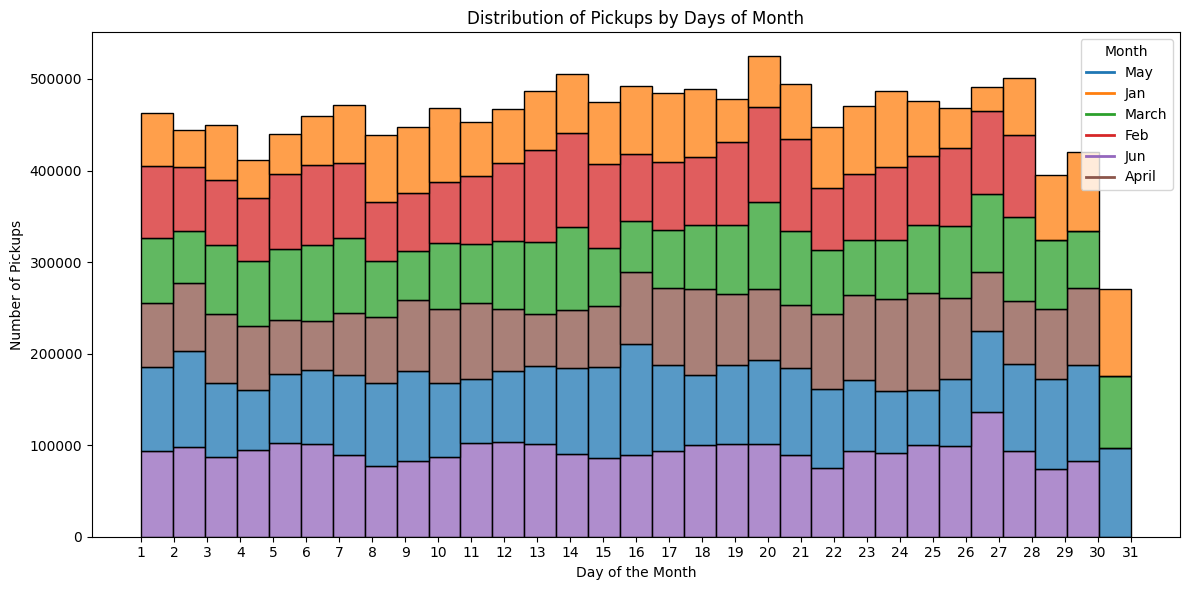

In [135]:
unique_months = data['Month'].unique()
palette = sns.color_palette('tab10', n_colors=len(unique_months))

month_palette = dict(zip(unique_months, palette))

handles = [Line2D([0], [0], color=color, lw=2) for color in palette]
labels = [month for month in unique_months]

plt.figure(figsize=(12,6))
sns.histplot(data=data,x='Day',hue='Month',multiple='stack', bins=31, kde=False,palette=month_palette)
plt.title('Distribution of Pickups by Days of Month')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Pickups')
plt.xticks(range(1, 32))
plt.legend(handles=handles,labels=labels,title='Month')
plt.tight_layout()
plt.show()

### Distribution of pickups within days of week

In [43]:
np.unique(data['DayOfWeek'])

array(['Friday', 'Monday', 'Saturday', 'Sunday', 'Thursday', 'Tuesday',
       'Wednesday'], dtype=object)

In [137]:
np.unique(data['Month'])

array(['April', 'Feb', 'Jan', 'Jun', 'March', 'May'], dtype=object)

In [44]:
data

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Date/Time,Hour,Month,Day,DayOfWeek
0,B02617,2015-05-17 09:47:00,B02617,141,2015-05-17 09:47:00,9,May,17,Saturday
1,B02617,2015-05-17 09:47:00,B02617,65,2015-05-17 09:47:00,9,May,17,Saturday
2,B02617,2015-05-17 09:47:00,B02617,100,2015-05-17 09:47:00,9,May,17,Saturday
3,B02617,2015-05-17 09:47:00,B02774,80,2015-05-17 09:47:00,9,May,17,Saturday
4,B02617,2015-05-17 09:47:00,B02617,90,2015-05-17 09:47:00,9,May,17,Saturday
...,...,...,...,...,...,...,...,...,...
14270474,B02765,2015-05-08 15:43:00,B02765,186,2015-05-08 15:43:00,15,May,8,Thursday
14270475,B02765,2015-05-08 15:43:00,B02765,263,2015-05-08 15:43:00,15,May,8,Thursday
14270476,B02765,2015-05-08 15:43:00,B02765,90,2015-05-08 15:43:00,15,May,8,Thursday
14270477,B02765,2015-05-08 15:44:00,B01899,45,2015-05-08 15:44:00,15,May,8,Thursday


In [140]:
data_agg = data.groupby(['Month', 'DayOfWeek']).size().reset_index(name='count')

C:\Users\MARKO\AppData\Local\Temp\ipykernel_11664\196324485.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_agg = data.groupby(['Month', 'DayOfWeek']).size().reset_index(name='count')


In [141]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

data_agg['DayOfWeek'] = pd.Categorical(data_agg['DayOfWeek'], categories=days_order, ordered=True)

In [142]:
data_agg

,Month,DayOfWeek,count
0,Jan,Friday,392900
1,Jan,Monday,200125
2,Jan,Saturday,234599
3,Jan,Sunday,194004
4,Jan,Thursday,345532
5,Jan,Tuesday,250109
6,Jan,Wednesday,336532
7,Feb,Friday,375296
8,Feb,Monday,292470
9,Feb,Saturday,302083


C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


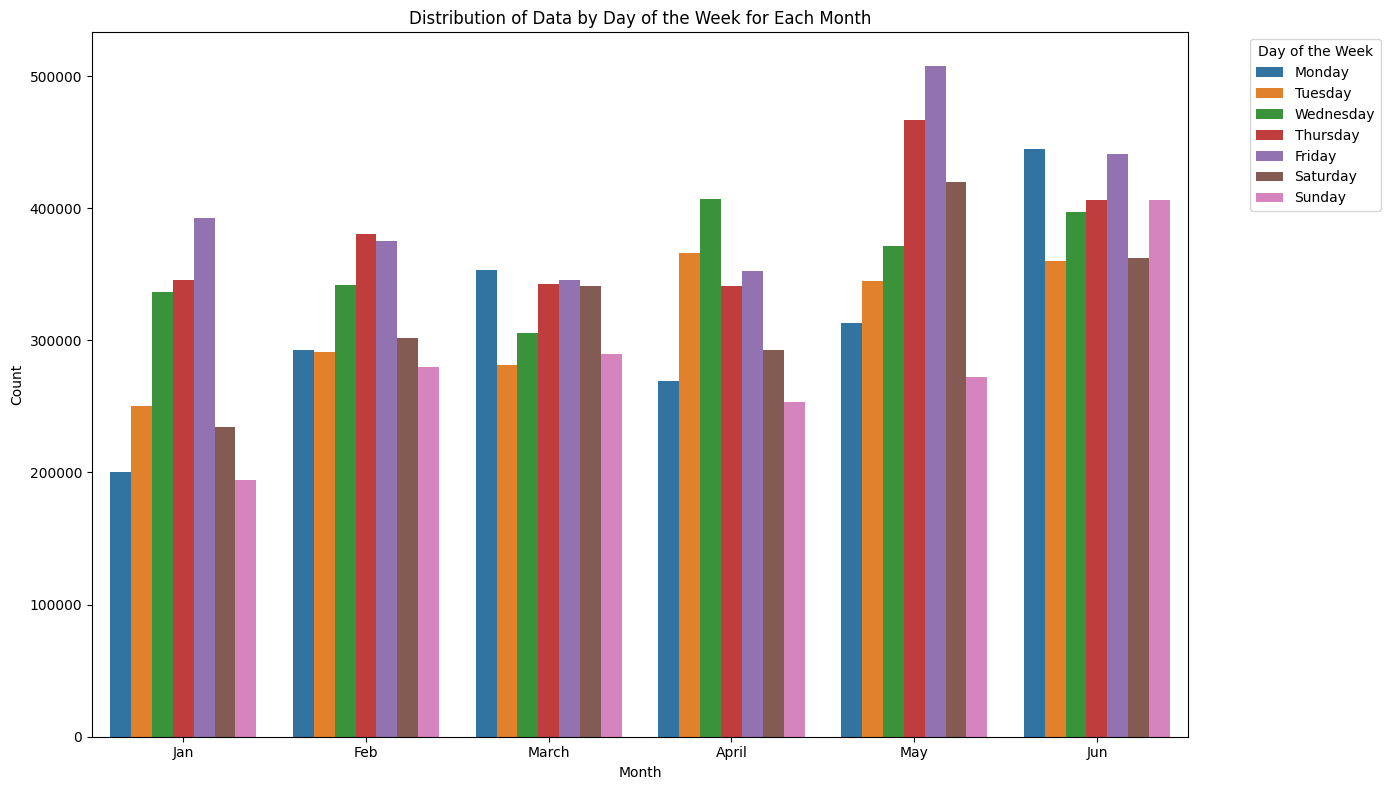

In [143]:
plt.figure(figsize=(14, 8))

sns.barplot(data=data_agg, x='Month', y='count', hue='DayOfWeek', hue_order=days_order, palette='tab10')

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Distribution of Data by Day of the Week for Each Month')
plt.legend(title='Day of the Week', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.show()

#TODO Add comment

In [45]:
week_day=pd.DataFrame(data['DayOfWeek'].value_counts())
week_day

,count
DayOfWeek,
Friday,2414563
Thursday,2282571
Wednesday,2159598
Saturday,1952782
Tuesday,1893811
Monday,1872902
Sunday,1694252


In [46]:
week_day['day_type'] = ['wd','wd','wd','we','wd','wd','we']

In [47]:
week_day

,count,day_type
DayOfWeek,,
Friday,2414563,wd
Thursday,2282571,wd
Wednesday,2159598,wd
Saturday,1952782,we
Tuesday,1893811,wd
Monday,1872902,wd
Sunday,1694252,we


In [48]:
pie=week_day.groupby(['day_type']).sum()
# pie.iloc[0,0]=pie.iloc[0,0]/5
# pie.iloc[1,0]=pie.iloc[1,0]/2
pie

,count
day_type,
wd,10623445
we,3647034


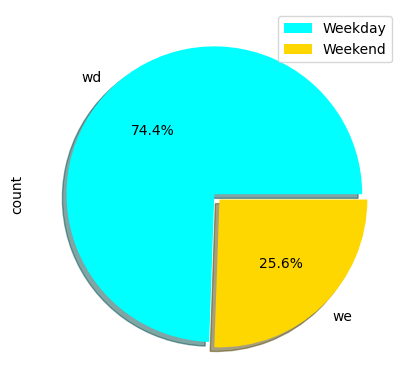

In [49]:
explode=[0,0.05]
colors=['cyan','gold']
labels=['Weekday','Weekend']
pie.plot.pie(autopct = '%1.1f%%',shadow=True,subplots=True,
        colors=colors,explode=explode)
plt.legend(labels=labels)
plt.show()

On this pie chart we can see that weekend pickups represent 1/4 of whole dataset, so we can conclude that people are much more using uber during weekdays. 

In [50]:
data

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Date/Time,Hour,Month,Day,DayOfWeek
0,B02617,2015-05-17 09:47:00,B02617,141,2015-05-17 09:47:00,9,May,17,Saturday
1,B02617,2015-05-17 09:47:00,B02617,65,2015-05-17 09:47:00,9,May,17,Saturday
2,B02617,2015-05-17 09:47:00,B02617,100,2015-05-17 09:47:00,9,May,17,Saturday
3,B02617,2015-05-17 09:47:00,B02774,80,2015-05-17 09:47:00,9,May,17,Saturday
4,B02617,2015-05-17 09:47:00,B02617,90,2015-05-17 09:47:00,9,May,17,Saturday
...,...,...,...,...,...,...,...,...,...
14270474,B02765,2015-05-08 15:43:00,B02765,186,2015-05-08 15:43:00,15,May,8,Thursday
14270475,B02765,2015-05-08 15:43:00,B02765,263,2015-05-08 15:43:00,15,May,8,Thursday
14270476,B02765,2015-05-08 15:43:00,B02765,90,2015-05-08 15:43:00,15,May,8,Thursday
14270477,B02765,2015-05-08 15:44:00,B01899,45,2015-05-08 15:44:00,15,May,8,Thursday


### Bases analysis
    Dispatching_base_num : The TLC base company code of the base that dispatched the Uber
    Affiliated_base_num : The TLC base company code affiliated with the Uber pickup

In [15]:
bases_map = {
    'B02512' : 'Unter',
    'B02598' : 'Hinter',
    'B02617' : 'Weiter',
    'B02682' : 'Schmecken',
    'B02764' : 'Danach-NY',
    'B02765' : 'Grun',
    'B02835' : 'Dreist',
    'B02836' : 'Drinnen'
}

In [52]:
np.unique(data['Dispatching_base_num'])

array(['B02512', 'B02598', 'B02617', 'B02682', 'B02764', 'B02765',
       'B02835', 'B02836'], dtype=object)

In [56]:
data['Affiliated_base_num'].unique()

array(['B02617', 'B02774', 'B02764', 'B02682', 'B02765', 'B00272',
       'B02401', 'B01087', 'B01197', 'B02512', 'B02729', 'B00227', nan,
       'B02598', 'B00013', 'B02003', 'B00628', 'B02818', 'B00254',
       'B02715', 'B01998', 'B02207', 'B02101', 'B02789', 'B02510',
       'B00412', 'B00111', 'B00477', 'B02806', 'B00448', 'B02664',
       'B02788', 'B01949', 'B02067', 'B00271', 'B02534', 'B02285',
       'B00837', 'B02770', 'B00277', 'B01877', 'B02522', 'B00014',
       'B00789', 'B02216', 'B01875', 'B02749', 'B02406', 'B00296',
       'B02507', 'B02787', 'B00053', 'B02345', 'B02670', 'B02822',
       'B01976', 'B00381', 'B00446', 'B02651', 'B02763', 'B01899',
       'B02732', 'B02016', 'B01913', 'B02588', 'B02644', 'B02835',
       'B02783', 'B02836', 'B02725', 'B02382', 'B02453', 'B02225',
       'B02772', 'B00888', 'B02499', 'B02815', 'B02712', 'B02277',
       'B02769', 'B02202', 'B02254', 'B02814', 'B00608', 'B02480',
       'B02847', 'B00235', 'B02780', 'B02776', 'B02472', 

### Dispaching bases analysis

In [19]:
data

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Date/Time,Hour,Month,Day,DayOfWeek
0,B02617,2015-05-17 09:47:00,B02617,141,2015-05-17 09:47:00,9,May,17,Saturday
1,B02617,2015-05-17 09:47:00,B02617,65,2015-05-17 09:47:00,9,May,17,Saturday
2,B02617,2015-05-17 09:47:00,B02617,100,2015-05-17 09:47:00,9,May,17,Saturday
3,B02617,2015-05-17 09:47:00,B02774,80,2015-05-17 09:47:00,9,May,17,Saturday
4,B02617,2015-05-17 09:47:00,B02617,90,2015-05-17 09:47:00,9,May,17,Saturday
...,...,...,...,...,...,...,...,...,...
14270474,B02765,2015-05-08 15:43:00,B02765,186,2015-05-08 15:43:00,15,May,8,Thursday
14270475,B02765,2015-05-08 15:43:00,B02765,263,2015-05-08 15:43:00,15,May,8,Thursday
14270476,B02765,2015-05-08 15:43:00,B02765,90,2015-05-08 15:43:00,15,May,8,Thursday
14270477,B02765,2015-05-08 15:44:00,B01899,45,2015-05-08 15:44:00,15,May,8,Thursday


In [20]:
data_disp_bases = data.groupby(['Dispatching_base_num'])

In [24]:
data_disp_bases = data_disp_bases.size().reset_index(name='count')

In [67]:
data_disp_bases = data_disp_bases.sort_values(by='count',ascending=False)

In [68]:
data_disp_bases

,Dispatching_base_num,count
4,B02764,5753653
3,B02682,3484530
2,B02617,2068525
1,B02598,1526660
5,B02765,1152727
0,B02512,255772
6,B02835,26622
7,B02836,1990


C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

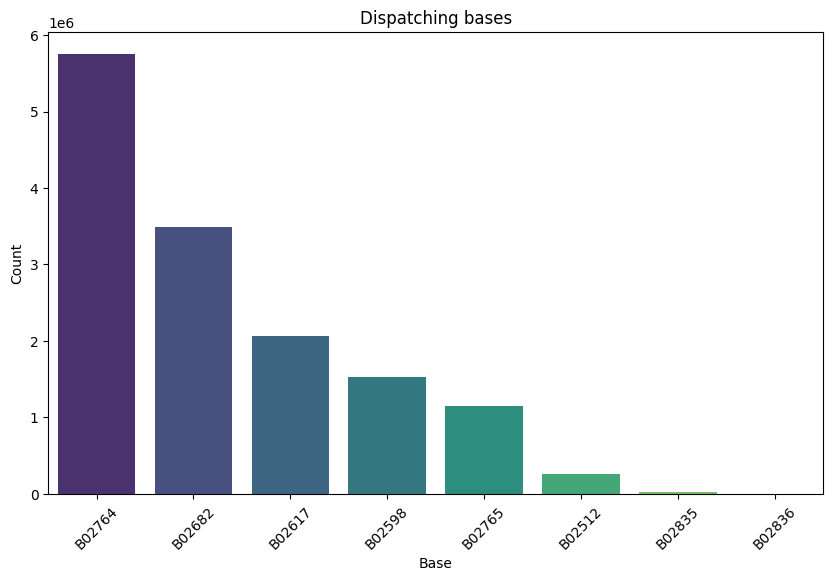

In [69]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Dispatching_base_num', y='count', data=data_disp_bases, palette='viridis')

# Set the title and labels
plt.title('Dispatching bases')
plt.xlabel('Base')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Show the plot
plt.show()


B02764 is the most dispaching base.

### Affiliated bases analysis

Since there is 284 different affiliated bases we will take a look into 10 most expressed.

In [34]:
top_affiliated_bases = data['Affiliated_base_num'].value_counts().sort_values(ascending=False)[:10]

In [56]:
tmp_df = pd.DataFrame()

In [58]:
tmp_df['Affiliated_base_num'] = top_affiliated_bases.index
tmp_df['count'] = top_affiliated_bases.values

In [60]:
tmp_df

,Affiliated_base_num,count
0,B02764,4352321
1,B02682,3448698
2,B02617,1946933
3,B02598,1287723
4,B02765,1038379
5,B02512,188112
6,B02729,138461
7,B02788,82707
8,B00111,80520
9,B00789,70530


C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) 

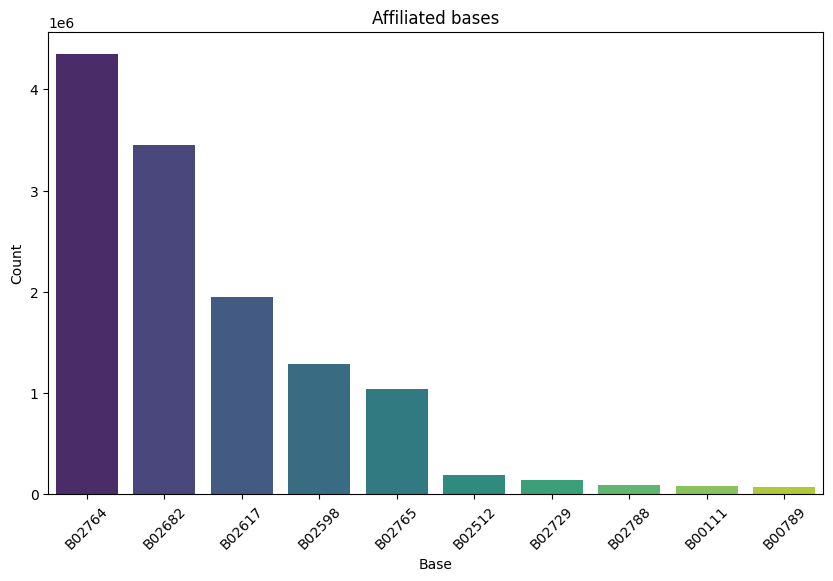

In [62]:
plt.figure(figsize=(10, 6))
sns.barplot(x='Affiliated_base_num', y='count', data=tmp_df, palette='viridis')

plt.title('Affiliated bases')
plt.xlabel('Base')
plt.ylabel('Count')
plt.xticks(rotation=45)

# Show the plot
plt.show()


We can notice that first 6 bases are same for both dispatching and affiliated, with B02764 and B02682 being most used ones in both cases.

### Analysing pickups with different dispatching and affiliated base

In [18]:
diff_base = data[data['Dispatching_base_num']!= data['Affiliated_base_num']]

In [62]:
len(diff_base)

3647483

In [60]:
len(data) - len(diff_base)

10622996

There is 3647483 pickups where dispaching base num is different from affiliated base num. Lets analyse them.

In [19]:
diff_base

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Date/Time,Hour,Month,Day,DayOfWeek
3,B02617,2015-05-17 09:47:00,B02774,80,2015-05-17 09:47:00,9,May,17,Saturday
7,B02617,2015-05-17 09:47:00,B02764,74,2015-05-17 09:47:00,9,May,17,Saturday
9,B02617,2015-05-17 09:47:00,B02764,22,2015-05-17 09:47:00,9,May,17,Saturday
20,B02617,2015-05-17 09:49:00,B02682,242,2015-05-17 09:49:00,9,May,17,Saturday
27,B02617,2015-05-17 09:50:00,B02764,234,2015-05-17 09:50:00,9,May,17,Saturday
...,...,...,...,...,...,...,...,...,...
14270468,B02765,2015-05-08 15:42:00,B02096,232,2015-05-08 15:42:00,15,May,8,Thursday
14270469,B02765,2015-05-08 15:42:00,B02764,79,2015-05-08 15:42:00,15,May,8,Thursday
14270473,B02765,2015-05-08 15:43:00,B02711,25,2015-05-08 15:43:00,15,May,8,Thursday
14270477,B02765,2015-05-08 15:44:00,B01899,45,2015-05-08 15:44:00,15,May,8,Thursday


It would be interesting to see weather there is a pattern in those pickups, and try to find the reason for change of base number, because this data represents 1/4 of the whole dataset, it is large amount of data.

We could see that there are only 8 dispaching bases, and a lot more of affiliated bases. Let's see if there is some pattern in mapping between bases.


In [66]:
data_agg_dis_aff_bases = diff_base.groupby(['Dispatching_base_num','Affiliated_base_num']).size().reset_index(name='count')

In [69]:
data_agg_dis_aff_bases

,Dispatching_base_num,Affiliated_base_num,count
0,B02512,B00014,684
1,B02512,B00084,67
2,B02512,B00111,106
3,B02512,B00227,3083
4,B02512,B00272,103
...,...,...,...
771,B02835,B02682,1311
772,B02835,B02749,83
773,B02835,B02764,582
774,B02835,B02765,77


In [105]:
data_agg_dis_aff_bases[data_agg_dis_aff_bases['Dispatching_base_num']=='B02835']

,Dispatching_base_num,Affiliated_base_num,count
764,B02835,B00111,36
765,B02835,B00448,3
766,B02835,B00628,44
767,B02835,B00789,121
768,B02835,B01998,66
769,B02835,B02512,223
770,B02835,B02617,293
771,B02835,B02682,1311
772,B02835,B02749,83
773,B02835,B02764,582


In [77]:
unique_bases = np.unique(data_agg_dis_aff_bases['Dispatching_base_num'])

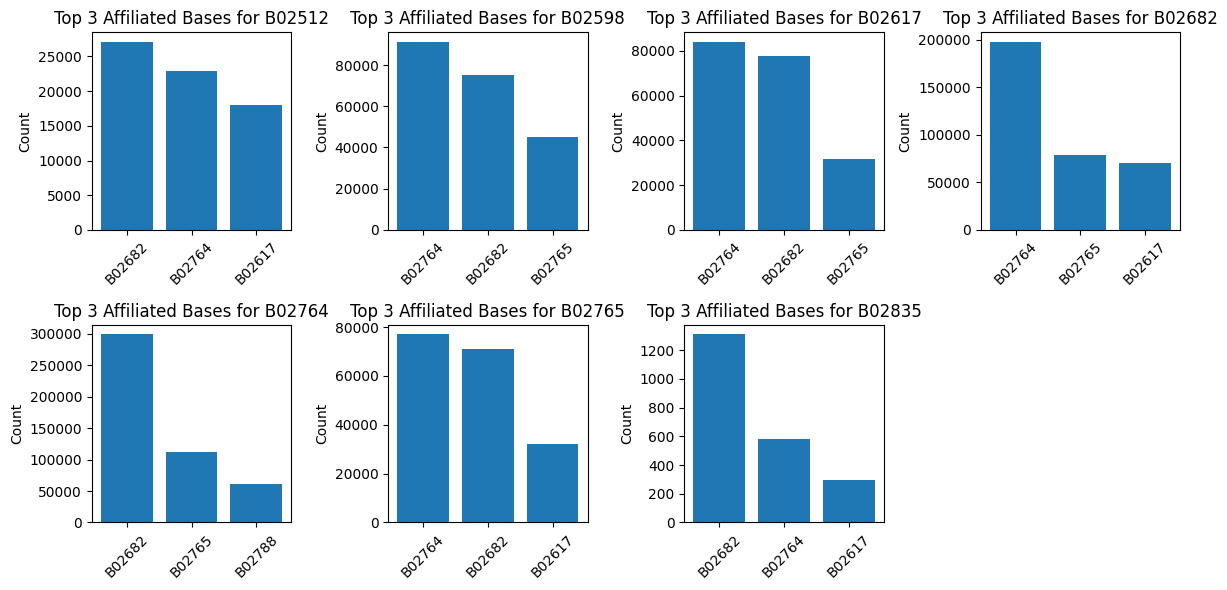

In [110]:
plt.figure(figsize=(12, 6))
for i,base in enumerate(unique_bases):
    curr_data = data_agg_dis_aff_bases[data_agg_dis_aff_bases['Dispatching_base_num']==base]
    top3 = curr_data.groupby('Dispatching_base_num').apply(lambda x: x.nlargest(3, 'count')).reset_index(drop=True)

    plt.subplot(2,4,i+1)

    # Iterate over unique Dispatching_base_num to create separate plots
    for base in top3['Dispatching_base_num'].unique():
        subset = top3[top3['Dispatching_base_num'] == base]
        plt.bar(subset['Affiliated_base_num'], subset['count'], label=f"Dispatch Base {base}")

    #plt.xlabel('Affiliated Base Number')
    plt.ylabel('Count')
    plt.title(f'Top 3 Affiliated Bases for {base}')
    plt.xticks(rotation=45)
    # plt.legend()
plt.tight_layout()
plt.show()

Here we represented top 3 affiliated bases for each of our Dispatching bases. We can see that scales differ a lot, ex B02764 is affiliated with B02682 close to 300 000 times while B02835 is affiliated with B02682 around 1300 times. We need to take that in consideration.
Next thing we can notice is that all of dispaching bases are mostly affiliated with one another, except B02788 which affiliates B02764 around 50 000 times.
Also we can notice that bases B02682 and B02764 affiliate most of other dispaching bases.

Let's analyse times when dispaching and affiliated bases differ.

In [112]:
diff_base

,Dispatching_base_num,Pickup_date,Affiliated_base_num,locationID,Date/Time,Hour,Month,Day,DayOfWeek
3,B02617,2015-05-17 09:47:00,B02774,80,2015-05-17 09:47:00,9,May,17,Saturday
7,B02617,2015-05-17 09:47:00,B02764,74,2015-05-17 09:47:00,9,May,17,Saturday
9,B02617,2015-05-17 09:47:00,B02764,22,2015-05-17 09:47:00,9,May,17,Saturday
20,B02617,2015-05-17 09:49:00,B02682,242,2015-05-17 09:49:00,9,May,17,Saturday
27,B02617,2015-05-17 09:50:00,B02764,234,2015-05-17 09:50:00,9,May,17,Saturday
...,...,...,...,...,...,...,...,...,...
14270468,B02765,2015-05-08 15:42:00,B02096,232,2015-05-08 15:42:00,15,May,8,Thursday
14270469,B02765,2015-05-08 15:42:00,B02764,79,2015-05-08 15:42:00,15,May,8,Thursday
14270473,B02765,2015-05-08 15:43:00,B02711,25,2015-05-08 15:43:00,15,May,8,Thursday
14270477,B02765,2015-05-08 15:44:00,B01899,45,2015-05-08 15:44:00,15,May,8,Thursday


In [113]:
month_counts = diff_base['Month'].value_counts().sort_index()

C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


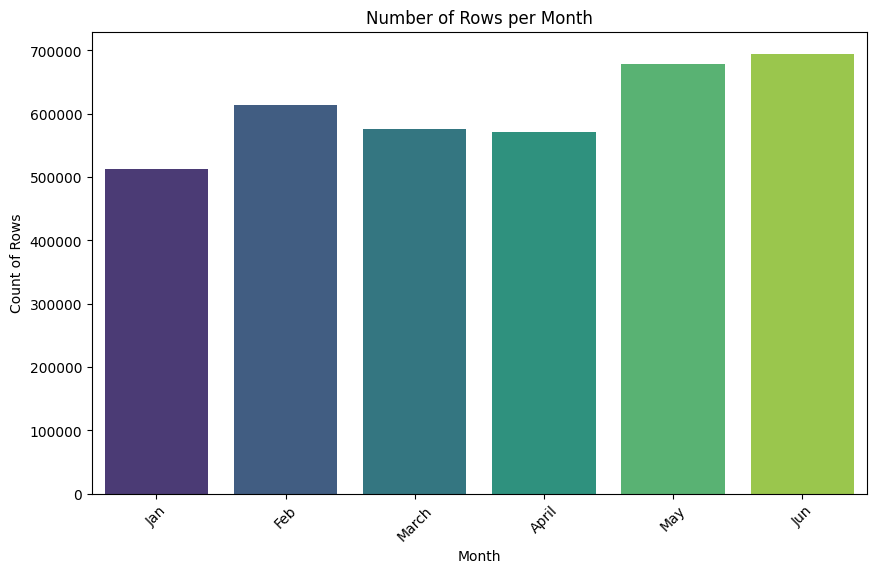

In [114]:
month_counts_df = month_counts.reset_index()
month_counts_df.columns = ['Month', 'Count']

plt.figure(figsize=(10, 6))
sns.barplot(x='Month', y='Count', data=month_counts_df, order=month_order, palette='viridis')

plt.title('Number of Rows per Month')
plt.xlabel('Month')
plt.ylabel('Count of Rows')
plt.xticks(rotation=45)

plt.show()

There is no significant difference between different months.

C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


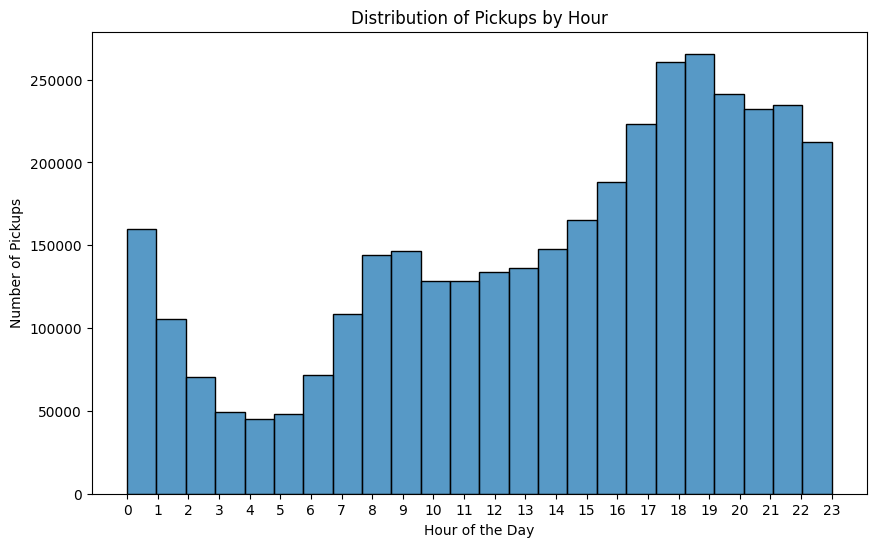

In [115]:
plt.figure(figsize=(10,6))
sns.histplot(diff_base['Hour'], bins=24, kde=False)
plt.title('Distribution of Pickups by Hour')
plt.xlabel('Hour of the Day')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 24))
plt.show()

distribution seems quite simmilar to when we analysed whole dataset 

C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operating instead.
  with pd.option_context('mode.use_inf_as_na', True):


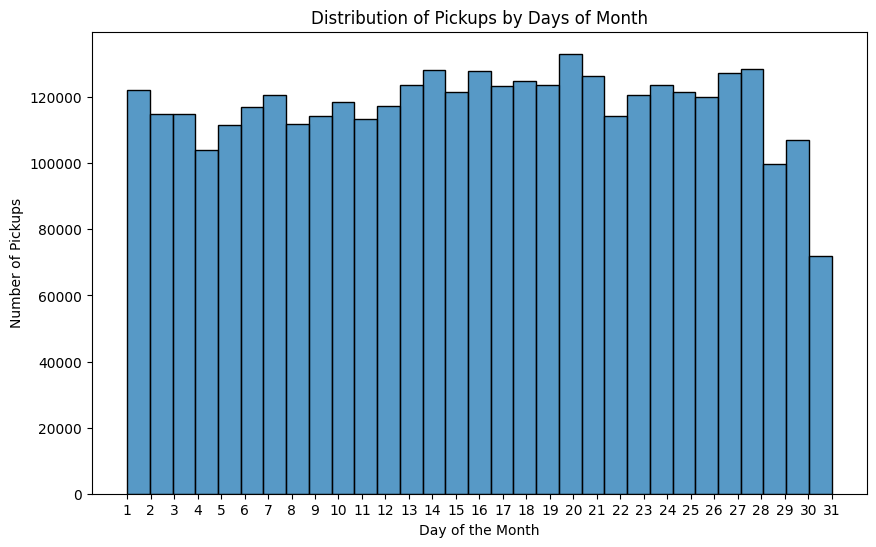

In [116]:
plt.figure(figsize=(10,6))
sns.histplot(diff_base['Day'], bins=31, kde=False)
plt.title('Distribution of Pickups by Days of Month')
plt.xlabel('Day of the Month')
plt.ylabel('Number of Pickups')
plt.xticks(range(1, 32))
plt.show()

Also no significant conclusion from day of month analysis.

C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1119: FutureWarning: use_inf_as_na option is deprecated and will be removed in a future version. Convert inf values to NaN before operati

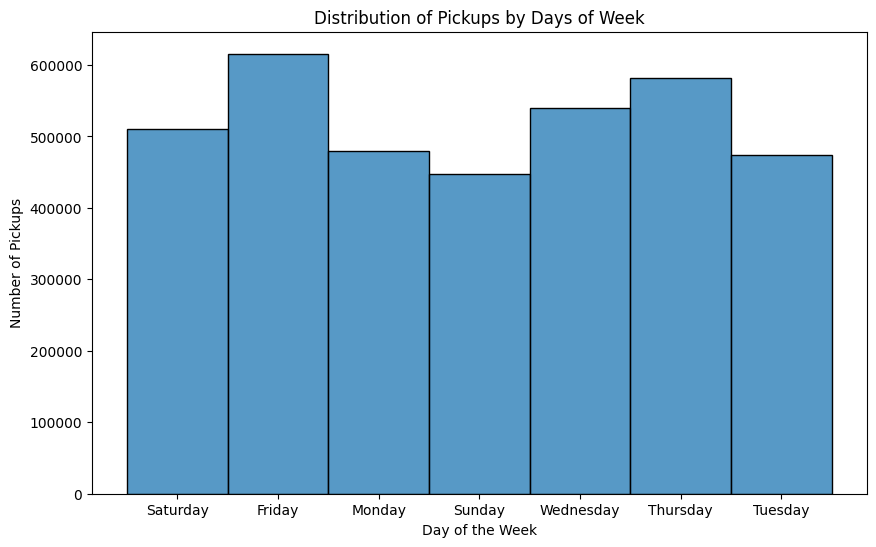

In [118]:
plt.figure(figsize=(10,6))
sns.histplot(diff_base['DayOfWeek'], bins=7, kde=False)
plt.title('Distribution of Pickups by Days of Week')
plt.xlabel('Day of the Week')
plt.ylabel('Number of Pickups')
plt.xticks(range(0, 7))
plt.show()

We can conclude that switching between different bases directly depends of number of trips. All of the plots have simmilar distribution to when observing whole dataset.

### Heatmaps

In [119]:
data_agg_day_hour = diff_base.groupby(['Day','Hour']).size().unstack(level=0)

In [120]:
data_agg_day_hour

Day,1,2,3,4,5,6,7,8,9,10,...,22,23,24,25,26,27,28,29,30,31
Hour,,,,,,,,,,,,,,,,,,,,,
0,6723,4113,4586,4195,4099,4526,6033,5468,4247,5293,...,5742,4191,5180,6004,5271,4727,6717,4602,4166,3937
1,5494,2543,3803,2439,2489,2721,4220,3585,2463,3270,...,4116,2436,3359,3931,3502,3084,4559,3104,2546,2826
2,4795,1576,2597,1699,1594,1690,2772,1763,1500,2135,...,2761,1540,2331,2698,2312,1969,3129,2124,1639,1878
3,3398,1073,1548,1208,1125,1188,1872,2018,1042,1523,...,1853,1115,1730,1821,1598,1565,2207,1356,1055,1269
4,2390,1132,1361,1191,1182,1241,1566,1738,1165,1247,...,1639,1282,1519,1520,1478,1601,1754,1335,1212,889
5,1890,1446,1414,1468,1499,1577,1396,1621,1501,1436,...,1709,1745,1638,1501,1769,1519,1523,1496,1499,767
6,2243,2313,2028,2203,2377,2458,1975,2251,2507,2202,...,2445,2765,2417,2207,2818,2402,2200,2179,2257,1012
7,2937,3782,3192,3486,3953,3999,2962,3547,4034,3343,...,3435,4150,3824,3131,4282,3551,3337,3255,3491,1413
8,3830,5082,4205,4436,5232,5163,3926,4536,5384,4342,...,4461,5491,5053,4141,5661,4685,4490,4177,4538,1929


In [121]:
data_agg_day_hour = data_agg_day_hour.reindex(index=sorted(data_agg_day_hour.index, reverse=True))

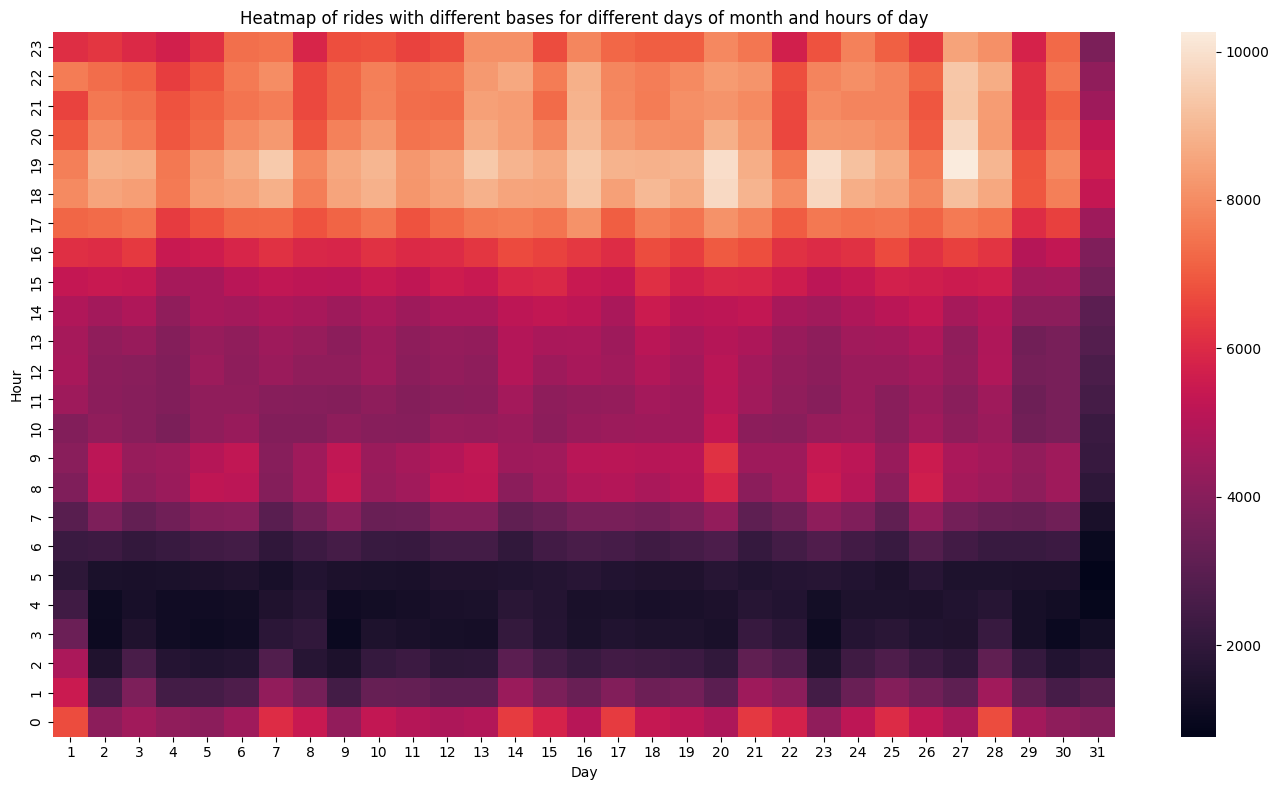

In [122]:
plt.figure(figsize=(14,8))

sns.heatmap(data=data_agg_day_hour,annot=False)

plt.title('Heatmap of rides with different bases for different days of month and hours of day')

plt.tight_layout()

plt.show()

We can notice that distribution is simmilar not depending of day of the month, most of bases affiliation happens in the evening 18-19h, but that's corresponding to the distribution of data, because generaly thats the peak time for pickups.

#### HeatMap by Month and Day

In [123]:
data_agg_month_day = diff_base.groupby(['Day','Month']).size().unstack(level=0)

C:\Users\MARKO\AppData\Local\Temp\ipykernel_25164\2702750788.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_agg_month_day = diff_base.groupby(['Day','Month']).size().unstack(level=0)


In [124]:
data_agg_month_day = data_agg_month_day.reindex(index=sorted(data_agg_month_day.index,reverse=True))

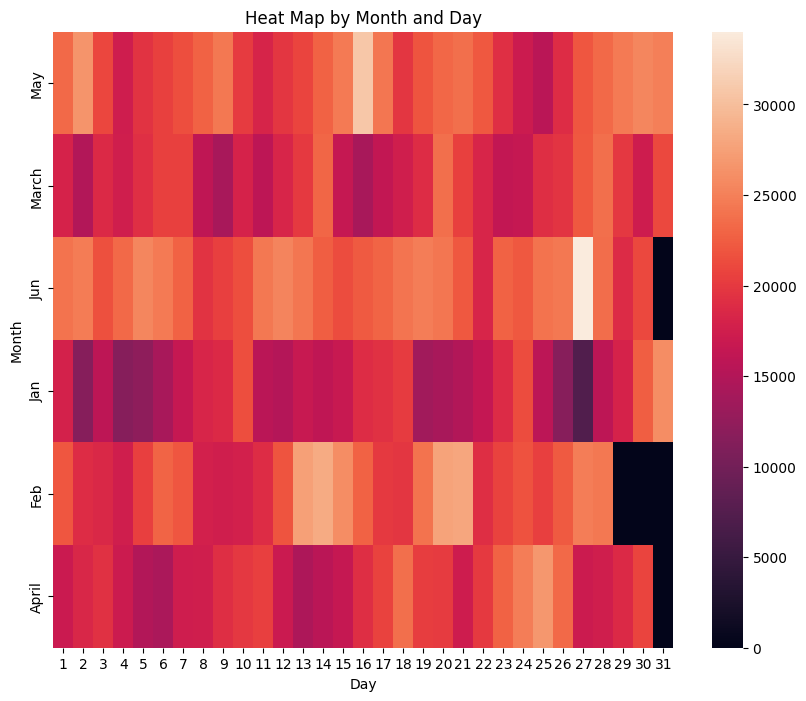

In [125]:
plt.figure(figsize=(10,8))

sns.heatmap(data_agg_month_day)

plt.title('Heat Map by Month and Day')

plt.show()

In [128]:
len(diff_base[(diff_base['Month']=='Jun') & (diff_base['Day']==27)])

34015

We can see that on June of 27th we had most changes of bases, the reason is that on 27.6.2015. a man was fatally shot and stabbed in Manhattan. Possibly people felt unsecure and took more uber rides, with more load on uber bases had to change.

#### Heat Map of Month and Day of Week

In [28]:
data_agg_month_weekday = diff_base.groupby(['Month','DayOfWeek']).size().unstack(level=0)

C:\Users\MARKO\AppData\Local\Temp\ipykernel_6556\1414120846.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_agg_month_weekday = diff_base.groupby(['Month','DayOfWeek']).size().unstack(level=0)


In [29]:
data_agg_month_weekday = data_agg_month_weekday.reindex(index=sorted(data_agg_month_weekday.index,reverse=True))

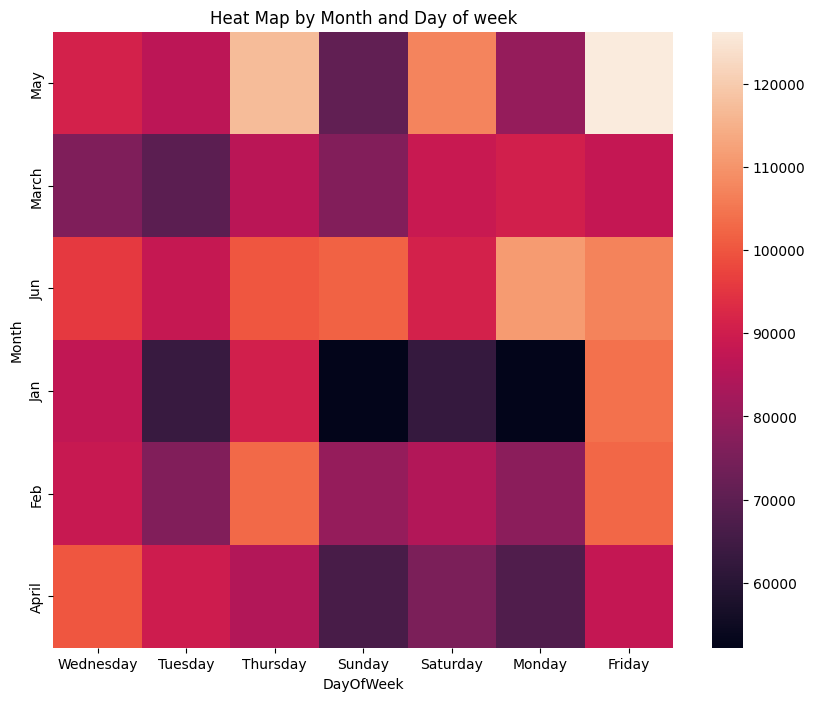

In [135]:
plt.figure(figsize=(10,8))
sns.heatmap(data_agg_month_weekday)
plt.title('Heat Map by Month and Day of week')
plt.show()

We can see that for a lot of months most differences between dispached base and affiliated base appear on Friday. 
Also Friday in May has lot more differences in bases than other months and days.
While For Sunday and Monday in January we see least difs between bases.

In [32]:
data_agg_month_dayofweek = diff_base.groupby(['Month', 'DayOfWeek']).size().reset_index(name='count')

C:\Users\MARKO\AppData\Local\Temp\ipykernel_6556\128479955.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_agg_month_dayofweek = diff_base.groupby(['Month', 'DayOfWeek']).size().reset_index(name='count')


In [33]:
days_order = ['Monday', 'Tuesday', 'Wednesday', 'Thursday', 'Friday', 'Saturday', 'Sunday']

data_agg_month_dayofweek['DayOfWeek'] = pd.Categorical(data_agg_month_dayofweek['DayOfWeek'], categories=days_order, ordered=True)

C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\_oldcore.py:1498: FutureWarning: is_categorical_dtype is deprecated and will be removed in a future version. Use isinstance(dtype, CategoricalDtype) instead
  if pd.api.types.is_categorical_dtype(vector):
C:\Users\MARKO\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:641: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  grouped_vals = vals.groupby(grouper)


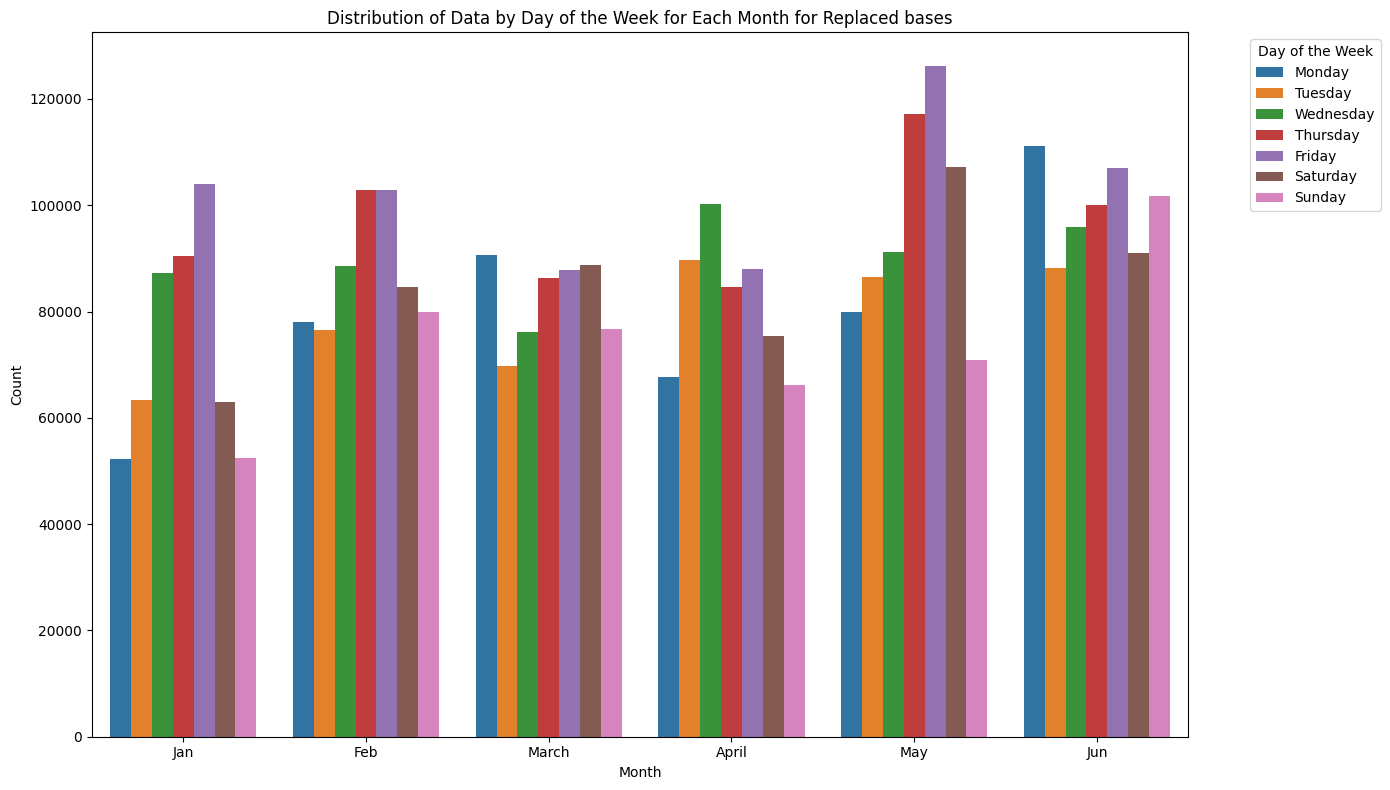

In [37]:
plt.figure(figsize=(14, 8))

sns.barplot(data=data_agg_month_dayofweek, x='Month', y='count', hue='DayOfWeek', hue_order=days_order, palette='tab10')

plt.xlabel('Month')
plt.ylabel('Count')
plt.title('Distribution of Data by Day of the Week for Each Month for Replaced bases')
plt.legend(title='Day of the Week', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.tight_layout()

plt.show()

As we can see fridays apear as top day for uber pickups in most of the months, that's the reason why we also have most of replacements between dispatching and affiliating bases on fridays. Also on Fridays in May happaned the most uber pickups in the whole dataset so again with that comes the most of most replacements of bases, analogously for Mondays and Sundays in January we have least pickup info.

In [140]:
len(diff_base[(diff_base['Month'] == 'May') & (diff_base['DayOfWeek'] == 'Friday')])

126222

In [138]:
len(diff_base[(diff_base['Month'] == 'Jan') & (diff_base['DayOfWeek'] == 'Monday')])

52220

In [139]:
len(diff_base[(diff_base['Month'] == 'Jan') & (diff_base['DayOfWeek'] == 'Sunday')])

52369

Looking into these numbers we can see that it's not drastic difference, and this is explainable with just the number of pickups being generaly smallest on Sundays and Mondays, and largest on Fridays, with that number of different dispaching and affiliated bases changes accordingly.

#### Heat Map by Bases and Month

In [84]:
data_agg_base_Month = diff_base.groupby(['Dispatching_base_num','Affiliated_base_num','Month']).size().unstack(level=0)

C:\Users\MARKO\AppData\Local\Temp\ipykernel_2104\2984683598.py:1: FutureWarning: The default of observed=False is deprecated and will be changed to True in a future version of pandas. Pass observed=False to retain current behavior or observed=True to adopt the future default and silence this warning.
  data_agg_base_Month = diff_base.groupby(['Dispatching_base_num','Affiliated_base_num','Month']).size().unstack(level=0)


In [85]:
data_agg_base_Month = data_agg_base_Month.reindex(index=sorted(data_agg_base_Month.index,reverse=True))

In [86]:
data_agg_base_Month

Dispatching_base_num       B02512  B02598  B02617  B02682  B02764  B02765  \
Affiliated_base_num Month                                                   
B02849              May         0       0       0       0       0       0   
                    March       0       0       0       0       0       0   
                    Jun         0       0       0       0       0       0   
                    Jan         0       0       0       0       0       0   
                    Feb         0       0       0       0       0       0   
...                           ...     ...     ...     ...     ...     ...   
B00013              March       0     156     246       0    3084     820   
                    Jun         0     147       2     260    3983     883   
                    Jan         0     135     862      94    3195     175   
                    Feb         0     146     604     207    3361     189   
                    April       0     200      38       0    4097    1314   

Dispatching_base_num       B02835  
Affiliated_base_num Month          
B02849              May         0  
                    March       0  
                    Jun         0  
                    Jan         0  
                    Feb         0  
...                           ...  
B00013              March       0  
                    Jun         0  
                    Jan         0  
                    Feb         0  
                    April       0  

[1704 rows x 7 columns]

In [101]:
data_agg_base_Month.max()

Dispatching_base_num
B02512     6487
B02598    23066
B02617    23810
B02682    35424
B02764    92508
B02765    22910
B02835     1311
dtype: int64

In [103]:
data_agg_base_Month['B02764']['B02682']

Month
May      78510
March    41412
Jun      92508
Jan      13021
Feb      20063
April    54073
Name: B02764, dtype: int64

Largest amount of times that BO2764 has been replaced with B02682 is in the June, 92508 times. In May we have a bit less replacements : 78510. Also number increases as the months pass by, also explainable with our growing number of pickups as the time pass by. Where in June in May we have largest number of trips and with that largest amount of replaced bases.

Since information about location IDs should have been in taxi-zone-lookup.csv file that is missing from dataset, we were not able to analyse these location information.